In [69]:

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image,ImageFont,ImageDraw
import json
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

os.environ["CUDA_VISIBLE_DEVICES"] = "2,3"
meta_path='./4_HTP Art Therapy_2022-10-28/meta/HTP_ArtTherapy/'
json_path='./4_HTP Art Therapy_2022-10-28/'
img_path='./HTP_ArtTherapy/'
import sys
dirListing = os.listdir(meta_path)

In [70]:
house_maincategory_object={'집 전체':'house'}
house_object={'집 전체':'house',
              '집 지붕':'roof',
              '집 벽':'wall',
              '집 창문':'window',
              '집 굴뚝':'chimney',
              '집 현관문':'door'}
house_subcategory_object={'집 지붕':'roof',
              '집 벽':'wall',
              '집 창문':'window',
              '집 굴뚝':'chimney',
              '집 현관문':'door'}
house_roof_subcategory_object={'집 굴뚝':'chimney'}
house_id={'house':0,
          'window':1,
              'roof':2,
              'wall':3,
              'door':4,
              'chimney':5}

tree_object={'나무 전체':'tree',
             '나무 수관':'crown',
             '나무 기둥':'pillar',
             '나무 열매':'fruit',
             '나무 잎':'leaf',
             '나무 뿌리':'root',
             '나무 가지':'branch'
             }
tree_maincategory_object={'나무 전체':'tree'}
tree_subcategory_object={'나무 수관':'crown',
             '나무 기둥':'pillar',
             '나무 열매':'fruit',
             '나무 잎':'leaf',
             '나무 뿌리':'root'
             }
tree_crown_subcategory_object={'나무 열매':'fruit',
             '나무 가지':'branch',
             '나무 잎':'leaf'
             }
tree_pillar_subcategory_object={'나무 가지':'branch'}
tree_id={'tree':0,
            'crown':1,
              'pillar':2,
              'fruit':3,
              'branch':4,
              'leaf':5,
              'root':6,
              'surface':7,
              'stem':8}

person_object={'사람 전체':'person',
               '사람 머리':'head',
                '사람 얼굴':'face',
                '사람 팔':'arm',
                '사람 다리':'leg',
                '사람 눈':'eye',
                '사람 코':'nose',
                '사람 입':'mouth',
                '사람 귀':'ear',
                '사람 손':'hand',
                '사람 발':'foot'}
person_maincategory_object={'사람 전체':'person'}
person_subcategory_object={'사람 머리':'head',
                           '사람 얼굴':'face',
                           '사람 팔':'arm',
                           '사람 다리':'leg'}
person_face_subcategory_object={'사람 눈':'eye',
                           '사람 코':'nose',
                           '사람 입':'mouth',
                           '사람 귀':'ear'}
person_arm_subcategory_object={'사람 손':'hand'}
person_leg_subcategory_object={'사람 발':'foot'}
person_id={'person':0,
            'head':1,
              'face':2,
              'eye':3,
              'nose':4,
              'mouth':5,
              'ear':6,
              'arm':7,
              'hand':8,
              'leg':9,
              'foot':10,
              'eyebrow':11}

house_Annotations_allcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': [],
            'option_name': []}

house_Annotations_maincategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
house_Class_mapping_data = {'class_name': [],
            'id': []}

house_Annotations_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
house_Annotations_roof_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}

tree_Annotations_maincategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}

tree_Annotations_allcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}

tree_Class_mapping_data = {'class_name': [],
            'id': []}

tree_Annotations_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
tree_Annotations_crown_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
tree_Annotations_pillar_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}


person_Annotations_maincategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
person_Annotations_allcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}

person_Class_mapping_data = {'class_name': [],
            'id': []}

person_Annotations_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
person_Annotations_face_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
person_Annotations_arm_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}
person_Annotations_leg_subcategory_data = {'file_path': [],
            'x1': [],
            'y1': [],
            'x2': [],
            'y2': [],
            'class_name': []}



In [71]:
house_ban=['image 2022083010_PNF138','image 20220826915_PNF134','image 20220829114_PNF141','image 20220830927_PNF120']
tree_ban=['Image 20220814 05736_PNF103','image_M025','image_M004','image202209030815_PNF183','image202209050731_PNF170','image202209131124_PNF176','image202209140850_PNF210','image 202209011153_PNF109','image 202209200627_PNF198',
          'image202209061030_PNF139',]
person_ban2=['image 20220830927_PNF120','image 202209200627_PNF198','image 202209291310_PNF250','image_M004','image 202209161007_PNF230']
person_ban1=['image 20220830148_PNF115','image 20220830927_PNF120','image 202209200627_PNF198','image_M004']

ratio_width,ratio_height=0,0

In [73]:
def np_to_dict(category_data,npy):
    category_data['file_path'].append(npy[0])
    category_data['x1'].append(npy[1])
    category_data['y1'].append(npy[2])
    category_data['x2'].append(npy[3])
    category_data['y2'].append(npy[4])
    category_data['class_name'].append(npy[5])
    return category_data

def augmentation_data(img,gt):
    
 
    input_img = img[np.newaxis, :, :, :]
    bbox = gt
    
    seq = iaa.Sequential([
        iaa.Fliplr(0.5), # horizontal flips

        # Small gaussian blur with random sigma between 0 and 0.5.
        # But we only blur about 50% of all images.
        iaa.Sometimes(
            0.5,
            iaa.GaussianBlur(sigma=(0, 0.5))
        ),
        # Strengthen or weaken the contrast in each image.
        iaa.LinearContrast((0.75, 1.5)),
        # Add gaussian noise.
        # For 50% of all images, we sample the noise once per pixel.
        # For the other 50% of all images, we sample the noise per pixel AND
        # channel. This can change the color (not only brightness) of the
        # pixels.
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
        # Make some images brighter and some darker.
        # In 20% of all cases, we sample the multiplier once per channel,
        # which can end up changing the color of the images.
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        # Apply affine transformations to each image.
        # Scale/zoom them, translate/move them, rotate them and shear them.
        iaa.Affine(
            scale={"x": (0.7, 0.8), "y": (0.7, 0.8)},
            shear=(-8, 8)
        )
    ], random_order=True)
    
    aug_img, aug_bbox = seq(images = input_img, bounding_boxes = bbox)
    return aug_img[0],aug_bbox[0]

def house_Annotations(size,count,label_data,file_path):
    
    global house_Annotations_allcategory_data,ratio_width,ratio_height,X_H,Y_H,house_maincategory_object,house_object
    class_count=len(label_data['objects'])
    img=cv2.imread(file_path)
    img=Image.fromarray(img)
    img_width=img.size[0]
    img_height=img.size[1]
    reduplication_count=0
    for i in range(class_count):
        class_name=label_data['objects'][i]['class_name']
        option_name=''
        for j in range(len(label_data['objects'][i]['properties'])):
            try:
                if(option_name==''):
                    option_name+=label_data['objects'][i]['properties'][j]['option_name']
                else:
                    option_name+=','
                    option_name+=label_data['objects'][i]['properties'][j]['option_name']
            except:
                try:
                    if(option_name==''):
                        option_name+=label_data['objects'][i]['properties'][j]['option_names'][0]
                    else:
                        option_name+=','
                        option_name+=label_data['objects'][i]['properties'][j]['option_names'][0]
                except:
                    option_name=''
        if class_name in house_maincategory_object.keys():
            class_name1=house_object[class_name]
            img1=img.resize(size)
            reduplication_count+=1
            img1.save('./data/house/main_category/'+class_name1+'_'+str(count)+'.png')
            
        if class_name in house_object.keys():
            class_name=house_object[class_name]
            box_data=label_data['objects'][i]['frames'][0]['annotation']['coord']
            ratio_width=size[0]/img_width
            ratio_height=size[1]/img_height
            x=box_data['x']
            y=box_data['y']
            width=box_data['width']
            height=box_data['height']
            x4=(x+width)*ratio_width
            y4=(y+height)*ratio_height
            x3=x*ratio_width
            y3=y*ratio_height
            X_H,Y_H=x3,y3
            
            house_Annotations_allcategory_data['file_path'].append('house/main_category/house_'+str(count)+'.png')
            house_Annotations_allcategory_data['x1'].append(int(x3))
            house_Annotations_allcategory_data['y1'].append(int(y3))
            house_Annotations_allcategory_data['x2'].append(int(x4))
            house_Annotations_allcategory_data['y2'].append(int(y4))
            house_Annotations_allcategory_data['class_name'].append(class_name)
            house_Annotations_allcategory_data['option_name'].append(option_name)
            
def house_sub_Annotations(size,allcategory_data):
    
    global house_subcategory_object,house_wall_subcategory_object,house_roof_subcategory_object
    all_data = pd.DataFrame(allcategory_data)
    all_data=np.array(all_data)
    
    

In [74]:
size_m=(1024,1024)
size_s=(512,512)
count=0
p_count=0
for meta in dirListing:
    with open(meta_path+meta, 'r') as f:
        json_data = json.load(f)
    
    folder_name=json_data['data_key']
    file_name=json_data['frames']
    json_name=json_data['label_path']
    if folder_name in house_ban:
        continue
    with open(json_path+json_name[0], 'r') as f:
        label_data = json.load(f)
    class_count=len(label_data['objects'])
    file_path=img_path+folder_name+'/'+file_name[0]
    house_Annotations(size_m,p_count,label_data,file_path)    
    p_count=p_count+1

In [75]:
all_data = pd.DataFrame(house_Annotations_allcategory_data)
index=int(len(all_data)*0.8)
all_data=all_data.to_numpy()
data=pd.DataFrame(all_data[:index])
data.to_csv('./data/house_entirety_allcategory_Annotations.csv',index=False,encoding='cp949',header=False)

SyntaxError: unexpected EOF while parsing (<ipython-input-63-dc4711af1132>, line 8)

In [78]:

size_s=(512,512)
path='./data/'
asd = pd.DataFrame(house_Annotations_allcategory_data)
all_data=np.array(asd)
for i in np.where(all_data[:,5]=='house')[0]:
    index=np.where(all_data[:,0]==all_data[i,0])[0]
    x1=all_data[index]
    a=np.where(x1[:,5]=='house')[0]
    house_Annotations_maincategory_data=np_to_dict(house_Annotations_maincategory_data,x1[a][0])
    image_path=path+x1[a][0,0]
    img=cv2.imread(image_path)
    img=Image.fromarray(img)
    img1=img.crop((x1[a][0,1],x1[a][0,2],x1[a][0,3],x1[a][0,4]))
    b=x1[a][0,0].rfind('/')
    img1=img1.resize(size_s)
    img1.save('./data/house/sub_category'+x1[a][0,0][b:])
    wall_index=np.where(x1[:,5]=='wall')[0]
    sub_category=np.copy(x1)
    rows, columns = sub_category.shape
    ratio_w=size_s[0]/(x1[a][0,3]-x1[a][0,1])
    ratio_h=size_s[0]/(x1[a][0,4]-x1[a][0,2])
    delete_index=np.array([])
    for k in range(rows):
        sub_category[k,0]='house/sub_category'+x1[a][0,0][b:]
        if sub_category[k,5] in house_subcategory_object.values():
            sub_category[k,1]-=x1[a,1][0]
            sub_category[k,2]-=x1[a,2][0]
            sub_category[k,3]-=x1[a,1][0]
            sub_category[k,4]-=x1[a,2][0]
            if int(sub_category[k,1]*ratio_w)<0:
                sub_category[k,1]=0
            else:
                sub_category[k,1]=int(sub_category[k,1]*ratio_w)

            if int(sub_category[k,2]*ratio_h)<0:
                sub_category[k,2]=0
            else:
                sub_category[k,2]=int(sub_category[k,2]*ratio_h)

            if int(sub_category[k,3]*ratio_w)>size_s[0]:
                sub_category[k,3]=size_s[0]
            else:
                sub_category[k,3]=int(sub_category[k,3]*ratio_w)

            if int(sub_category[k,4]*ratio_h)>size_s[1]:
                sub_category[k,4]=size_s[1]
            else:
                sub_category[k,4]=int(sub_category[k,4]*ratio_h)
            if int(sub_category[k,1]*ratio_w)>size_s[0] or int(sub_category[k,2]*ratio_h)>size_s[1]:
                delete_index=np.append(delete_index,k)
        else:
            delete_index=np.append(delete_index,k)
    sub_category=np.delete(sub_category,delete_index,axis=0)
    rows, columns = sub_category.shape
    for k in range(rows):
        house_Annotations_subcategory_data=np_to_dict(house_Annotations_subcategory_data,sub_category[k])    

/home/dgxadmin/anaconda3/envs/detectYS/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [79]:
#CSV data

for i in house_object.values():
    house_Class_mapping_data['class_name'].append(i)
    house_Class_mapping_data['id'].append(house_id[i])
for i in tree_object.values():
    tree_Class_mapping_data['class_name'].append(i)
    tree_Class_mapping_data['id'].append(tree_id[i])
for i in person_object.values():
    person_Class_mapping_data['class_name'].append(i)
    person_Class_mapping_data['id'].append(person_id[i])
asd = pd.DataFrame(house_Annotations_maincategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()

train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/house_entirety_maincategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/house_entirety_maincategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(house_Annotations_subcategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()
train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/house_entirety_subcategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/house_entirety_subcategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(house_Class_mapping_data)
asd.to_csv('./data/house_entirety_Classmapping.csv',index=False,header=False)
asd = pd.DataFrame(tree_Annotations_maincategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()
train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/tree_entirety_maincategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/tree_entirety_maincategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(tree_Annotations_subcategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()
train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/tree_entirety_subcategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/tree_entirety_subcategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(tree_Class_mapping_data)
asd.to_csv('./data/tree_entirety_Classmapping.csv',index=False,header=False)
asd = pd.DataFrame(person_Annotations_maincategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()
train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/person_entirety_maincategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/person_entirety_maincategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(person_Annotations_subcategory_data)
index=int(len(asd)*0.8)
asd=asd.to_numpy()
train=pd.DataFrame(asd[:index])
test=pd.DataFrame(asd[index:])
train.to_csv('./data/person_entirety_subcategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/person_entirety_subcategory_Annotations_val.csv',index=False,encoding='cp949',header=False)
asd = pd.DataFrame(person_Class_mapping_data)
asd.to_csv('./data/person_entirety_Classmapping.csv',index=False,header=False)



In [44]:
df = pd.read_csv('./data/tree_entirety_maincategory_Annotations.csv')
df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.8
train = df[msk]
test = df[~msk]
train=train.drop(columns=['split'])
test=test.drop(columns=['split'])
train.to_csv('./data/tree_entirety_maincategory_Annotations.csv',index=False,encoding='cp949',header=False)
test.to_csv('./data/tree_entirety_maincategory_Annotations_val.csv',index=False,encoding='cp949',header=False)


252


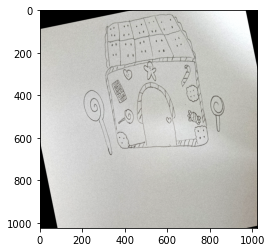

In [112]:
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

img = cv2.imread('house_0.png')
gt=[ia.BoundingBox(x1 = 288, y1 = 107, x2 = 679, y2 = 608)]

img1,gt=augmentation_data(img,gt)
plt.imshow(img1)


In [166]:
print(str('a'))


a
